### 1. Randomness

In [1]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
two_choice = make_array('treatment', 'control')
np.random.choice(two_choice)

'control'

In [3]:
np.random.choice(two_choice, 10)

array(['control', 'control', 'control', 'treatment', 'control',
       'treatment', 'treatment', 'control', 'control', 'treatment'],
      dtype='<U9')

In [9]:
'Dog' > 'Catastrophe' > 'Cat'

True

In [11]:
np.random.choice(two_choice, 10) == 'treatment'

array([ True, False,  True, False, False, False,  True,  True, False, False], dtype=bool)

In [12]:
tosses = make_array('Tails', 'Heads', 'Tails', 'Heads', 'Heads')
tosses == 'Heads'

array([False,  True, False,  True,  True], dtype=bool)

In [13]:
np.count_nonzero(tosses == 'Heads')

3

### 2. Conditional Statements

In [14]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [23]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'neither positive nor negative'

In [25]:
sign(-2), sign(0)

('negative', 'neither positive nor negative')

In [26]:
def one_bet(x):
    """Returns my net gain if the die shows x spots"""
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [27]:
one_bet(1), one_bet(2), one_bet(3), one_bet (4), one_bet(5), one_bet(6)

(-1, -1, 0, 0, 1, 1)

In [45]:
one_bet(np.random.choice(np.arange(1, 7)))

-1

### 3. Iteration

In [46]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [47]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [53]:
bet_on_one_roll()

0

In [54]:
for i in np.arange(10):
    print(bet_on_one_roll())

1
1
-1
1
1
0
0
0
1
-1


In [55]:
pets = make_array('Cat', 'Dog')
np.append(pets, 'Another Pet')

array(['Cat', 'Dog', 'Another Pet'],
      dtype='<U11')

In [57]:
pets #unchanged

array(['Cat', 'Dog'],
      dtype='<U3')

In [59]:
pets = np.append(pets, 'Another Pet')
pets #changed

array(['Cat', 'Dog', 'Another Pet', 'Another Pet'],
      dtype='<U11')

In [104]:
outcome = make_array()
for i in np.arange(300):
    outcome_of_roll = bet_on_one_roll()
    outcome = np.append(outcome, outcome_of_roll)

In [105]:
np.count_nonzero(outcome)

196

In [106]:
len(outcome)

300

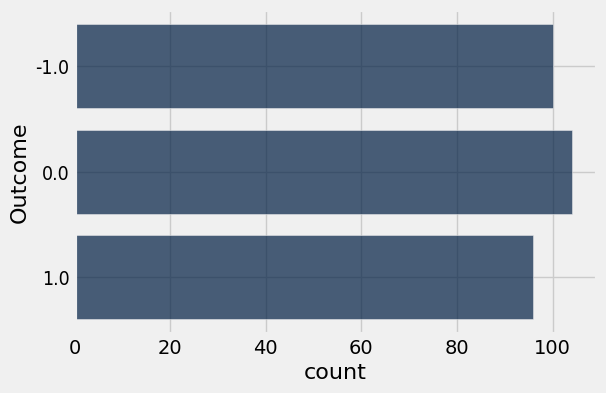

In [107]:
out_table = Table().with_column('Outcome', outcome)
out_table.group('Outcome').barh('Outcome')

### 4. Simulation

In [2]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [3]:
coin = make_array('Heads', 'Tails')

In [4]:
ten_tosses = np.random.choice(coin, 10)
ten_tosses

array(['Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads'],
      dtype='<U5')

In [5]:
np.count_nonzero(ten_tosses == 'Heads')

4

In [13]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

43

In [14]:
def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'Heads')

In [21]:
num_repetitions = 20000
heads = make_array()
for i in np.arange(num_repetitions):
    heads = np.append(heads, one_simulated_value())

In [22]:
len(heads)

20000

In [23]:
simulation_results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1), 
    'Number of Heads', heads)

In [24]:
simulation_results.show(3)

Repetition,Number of Heads
1,52
2,56
3,52


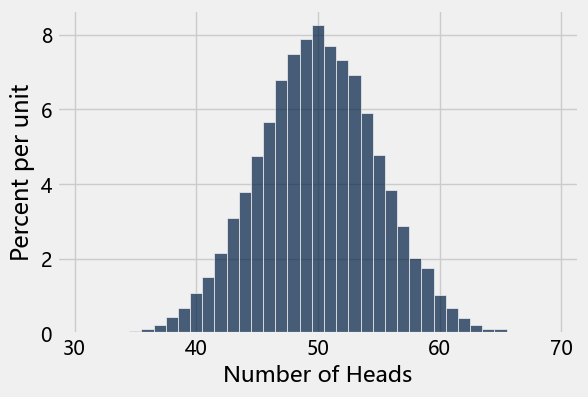

In [25]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))

In [36]:
die = np.arange(1, 7)
sum(np.random.choice(die, 2))

6

In [37]:
def one_simulated_move():
    return sum(np.random.choice(die, 2))

In [63]:
num_repetitions = 10000
moves = make_array()
for i in np.arange(num_repetitions):
    moves = np.append(moves, one_simulated_move())

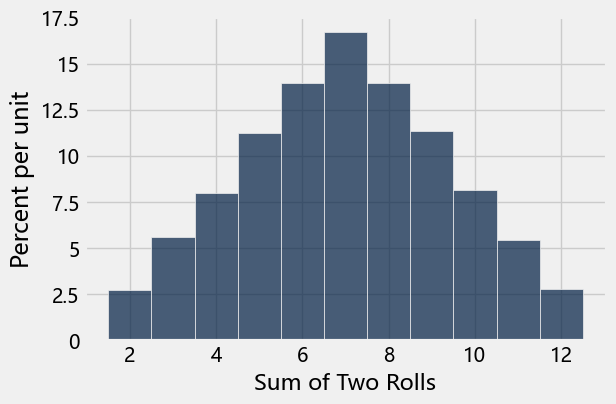

In [64]:
results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls', moves)
results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))

### 5. The Monty Hall Problem

In [65]:
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [66]:
goats = make_array('first goat', 'second goat')

In [67]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [68]:
other_goat('first goat'), other_goat('second goat'), other_goat('third goat')

('second goat', 'first goat', None)

In [69]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [70]:
def monty_hall_game():
    # will return [contestant's choice, revealed goat, remaining door]
    contestant_guess = np.random.choice(hidden_behind_doors)
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    elif contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    elif contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [73]:
monty_hall_game()

['car', 'first goat', 'second goat']

In [74]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in np.arange(10000):
    games.append(monty_hall_game())

In [75]:
games.show(3)

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car


In [76]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3283
first goat,3248
second goat,3469


In [77]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6717
first goat,1617
second goat,1666


In [79]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3283,6717
first goat,3248,1617
second goat,3469,1666


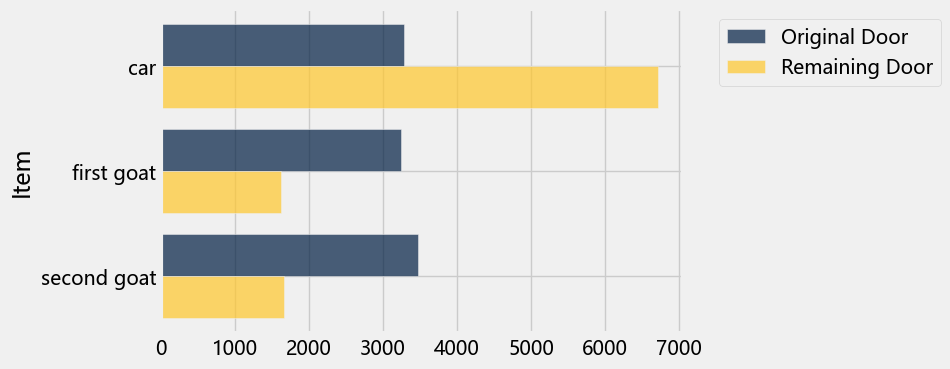

In [80]:
combined.barh(0)

### 6. Finding Probabilities

In [81]:
rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Roll', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls)
results

Roll,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


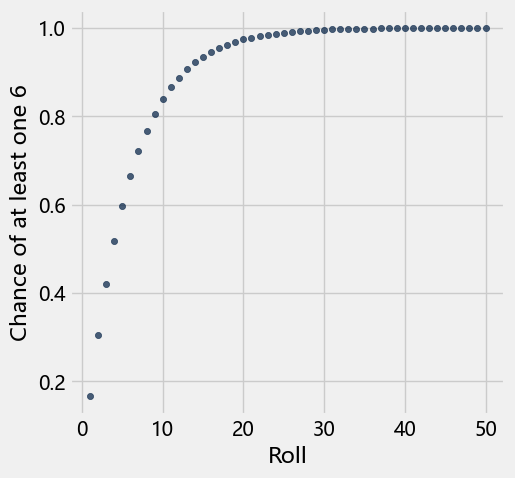

In [83]:
results.scatter('Roll')

In [85]:
results.where('Roll', are.equal_to(50))

Roll,Chance of at least one 6
50,0.99989
